In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('C:\Python\Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


2.Feature Engineering:

a) Correcting the feature names

In [92]:
#features have space,hyphen 
df.columns = (df.columns.str.strip().str.lower().str.replace(' ','_').str.replace('-','_'))
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

b) Imputation: Handling missing values in the dataset by filling them with appropriate values

In [93]:
#finding missing values
df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness__1_19_years                34
thinness_5_9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [94]:
#filling the missing values
df1 = df.interpolate()

In [95]:
df1.isnull().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under_five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness__1_19_years               0
thinness_5_9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

3. Encoding categorical variables: Our dataset contains both numerical and categorical data. As we are performing regression analysis it is important to convert the categorical data into numerical using OneHotEncoder.
Here we have the ‘status’ and ‘country’ as 2 categorical data that need conversion. Instead of label encoding, onehotencoder is preferred as the above two features are nominal data where ranking is not needed.

In [96]:
cat = df1[['status']]
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
catg = ohe.fit_transform(cat).toarray()
catg= pd.DataFrame(catg)
catg

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
2933,0.0,1.0
2934,0.0,1.0
2935,0.0,1.0
2936,0.0,1.0


In [97]:
cat2 = df1[['country']]

In [98]:
from sklearn.preprocessing import OneHotEncoder
ohen = OneHotEncoder()
cat3 = ohen.fit_transform(cat2).toarray()
cat3 = pd.DataFrame(cat3)
cat3

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [99]:
category = pd.concat([cat3,catg],axis = 1)
category

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,0,1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [100]:
numerical = df1.drop(['status','country','life_expectancy'],axis = 1)
numerical

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [101]:
final = pd.concat([numerical,category],axis = 1)
final

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,...,185,186,187,188,189,190,191,192,0,1
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2934,2003,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2935,2002,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2936,2001,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [102]:
Y = df1['life_expectancy']
Y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: life_expectancy, Length: 2938, dtype: float64

In [103]:
X = final
X
X.columns = X.columns.astype(str)

4. Splitting of dataset and training the data model

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size = 0.80)

In [105]:
x_train

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,...,185,186,187,188,189,190,191,192,0,1
593,2014,23.0,1,0.01,73.865849,88.000000,0,23.7,2,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2586,2014,12.0,0,1.13,0.000000,97.000000,116,59.7,0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2760,2001,14.0,1,1.67,243.753913,92.000000,30,55.0,1,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1733,2014,17.0,0,0.01,726.029176,87.000000,0,61.3,0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1377,2000,428.0,77,1.51,0.681686,82.666667,21002,14.4,121,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,2000,84.0,1,10.06,2944.640134,84.500000,1019,51.8,1,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,2014,122.0,31,5.26,168.173753,84.000000,3,62.8,36,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2776,2001,88.0,4,10.91,0.000000,97.294118,73,58.2,4,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1331,2014,113.0,4,0.41,63.878452,98.000000,20,64.8,4,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [106]:
y_train

593     63.2
2586    75.5
2760    74.5
1733    75.9
1377    51.9
        ... 
1844    78.1
1684    76.6
2776    78.0
1331    74.0
1851    85.0
Name: life_expectancy, Length: 2350, dtype: float64

In [107]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
model.predict(x_test)

array([69.00580594, 79.51060309, 56.46237866, 62.37219236, 54.05897245,
       84.44029047, 65.95611542, 67.24739227, 71.8189478 , 68.14078715,
       78.48902993, 71.82034865, 83.16457378, 82.59143616, 61.13008549,
       71.41290759, 80.75026783, 77.77712922, 72.56771045, 74.03812855,
       79.53941691, 68.53584115, 74.36292888, 82.60448563, 73.45196131,
       67.78670822, 82.74094426, 71.1100421 , 78.08433964, 76.16203919,
       63.13933298, 63.33434547, 69.11002942, 69.9045619 , 74.27101799,
       74.2110972 , 70.3530677 , 60.99946829, 81.12067113, 47.27645334,
       55.81419135, 82.44616537, 49.52396475, 60.34163207, 62.20443496,
       75.33402069, 60.70802753, 63.68605472, 54.7546384 , 62.52455575,
       53.24513514, 72.48916458, 64.61125749, 74.04776459, 66.65763949,
       73.5481631 , 70.99353336, 59.51803005, 44.26335146, 64.77875128,
       69.6825318 , 76.02933939, 58.0189042 , 75.23275327, 71.35721445,
       73.21850858, 72.2149854 , 67.42536432, 54.33169363, 65.97

In [108]:
model.score(x_test,y_test)

0.9581275700520938

In [109]:
predict = model.predict(x_test)
predict

array([69.00580594, 79.51060309, 56.46237866, 62.37219236, 54.05897245,
       84.44029047, 65.95611542, 67.24739227, 71.8189478 , 68.14078715,
       78.48902993, 71.82034865, 83.16457378, 82.59143616, 61.13008549,
       71.41290759, 80.75026783, 77.77712922, 72.56771045, 74.03812855,
       79.53941691, 68.53584115, 74.36292888, 82.60448563, 73.45196131,
       67.78670822, 82.74094426, 71.1100421 , 78.08433964, 76.16203919,
       63.13933298, 63.33434547, 69.11002942, 69.9045619 , 74.27101799,
       74.2110972 , 70.3530677 , 60.99946829, 81.12067113, 47.27645334,
       55.81419135, 82.44616537, 49.52396475, 60.34163207, 62.20443496,
       75.33402069, 60.70802753, 63.68605472, 54.7546384 , 62.52455575,
       53.24513514, 72.48916458, 64.61125749, 74.04776459, 66.65763949,
       73.5481631 , 70.99353336, 59.51803005, 44.26335146, 64.77875128,
       69.6825318 , 76.02933939, 58.0189042 , 75.23275327, 71.35721445,
       73.21850858, 72.2149854 , 67.42536432, 54.33169363, 65.97

5.Finding the best-fitted line using matplotlib

<Axes: xlabel='life_expectancy'>

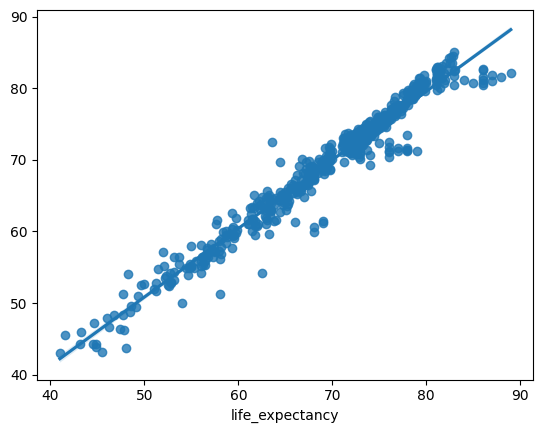

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.regplot(x = y_test, y = predict)

6.Understanding the accuracy of the model

Statistical Inferences
a) Mean Absolute Error: MAE is the mean size of the mistakes in collected predictions. The lower the value, the better the model’s performance

In [111]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, predict)
mae

1.1932185833356566

b)  Mean Squared Error: MSE is defined as the Mean or Average of the square of the difference between actual and estimated values.

In [112]:
mse = metrics.mean_squared_error(y_test, predict)
mse

3.497716816492894

c) R-Square: It is also known as the coefficient of determination. This metric indicates how well a model fits a given dataset. Its value ranges from 0 to 1, so if a model approaches 1 it indicates that it fits perfectly to the dataset provided.

In [113]:
r2 = metrics.r2_score(y_test, predict)
r2

0.9581275700520938

d) Adjusted R-square: The Adjusted — R2 has a penalizing factor. It penalizes for adding independent variables that don’t contribute to the model in any way or are not correlated to the dependent variable.

In [114]:
import statsmodels.api as sm
x_test = sm.add_constant(x_test)
model1 = sm.OLS(y_test,x_test).fit()

In [115]:
print(model1.rsquared_adj)

0.9579527464365144


In [116]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     68.89
Date:                Thu, 22 Aug 2024   Prob (F-statistic):          2.29e-225
Time:                        18:00:31   Log-Likelihood:                -1083.5
No. Observations:                 588   AIC:                             2563.
Df Residuals:                     390   BIC:                             3430.
Df Model:                         197                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            -303.6555     36.879     -8.234      0.000    -376.161    -231.150
year                                0.2646      0.028      9.393      0.000       0.209       0.320
adult_mortality                    -0.0016      0.001     -1.409      0.160      -0.004       0.001
infant_deaths                       0.0364      0.044      0.819      0.413      -0.051       0.124
alcohol                            -0.0323      0.063     -0.510      0.610      -0.157       0.092
percentage_expenditure           7.214e-05      0.000      0.611      0.541      -0.000       0.000
hepatitis_b                        -0.0013      0.005     -0.264      0.792      -0.011       0.009
measles                         -2.043e-05   1.38e-05     -1.482      0.139   -4.75e-05    6.68e-06
bmi                                -0.0119      0.008     -1.534      0.126      -0.027       0.003
under_five_deaths                  -0.0262      0.030     -0.877      0.381      -0.085       0.033
polio                               0.0157      0.006      2.822      0.005       0.005       0.027
total_expenditure                  -0.0637      0.062     -1.030      0.304      -0.185       0.058
diphtheria                         -0.0005      0.007     -0.074      0.941      -0.014       0.013
hiv/aids                           -0.3239      0.037     -8.867      0.000      -0.396      -0.252
gdp                             -4.342e-05   1.72e-05     -2.519      0.012   -7.73e-05   -9.53e-06
population                      -5.564e-09   4.78e-09     -1.163      0.245    -1.5e-08    3.84e-09
thinness__1_19_years                0.0353      0.060      0.592      0.554      -0.082       0.153
thinness_5_9_years                 -0.0779      0.061     -1.277      0.202      -0.198       0.042
income_composition_of_resources    -0.7731      1.120     -0.690      0.491      -2.975       1.429
schooling                           0.1538      0.115      1.338      0.182      -0.072       0.380
0                                 -10.5481      1.251     -8.429      0.000     -13.008      -8.088
1                                   5.4065      1.374      3.934      0.000       2.704       8.109
2                                   4.1527      0.826      5.030      0.000       2.530       5.776
3                                 -18.3672      1.523    -12.060      0.000     -21.361     -15.373
4                                   5.4239      1.176      4.612      0.000       3.112       7.736
5                                   5.4399      1.271      4.280      0.000       2.941       7.939
6                                   4.2634      0.993      4.292      0.000       2.310       6.217
7                                  -1.4173      1.211     -1.170      0.243      -3

7. Feature Selection: selecting a subset of relevant features from the original set of available features to improve model performance, reduce overfitting, and enhance interpretability.

Checking for correlation among the features

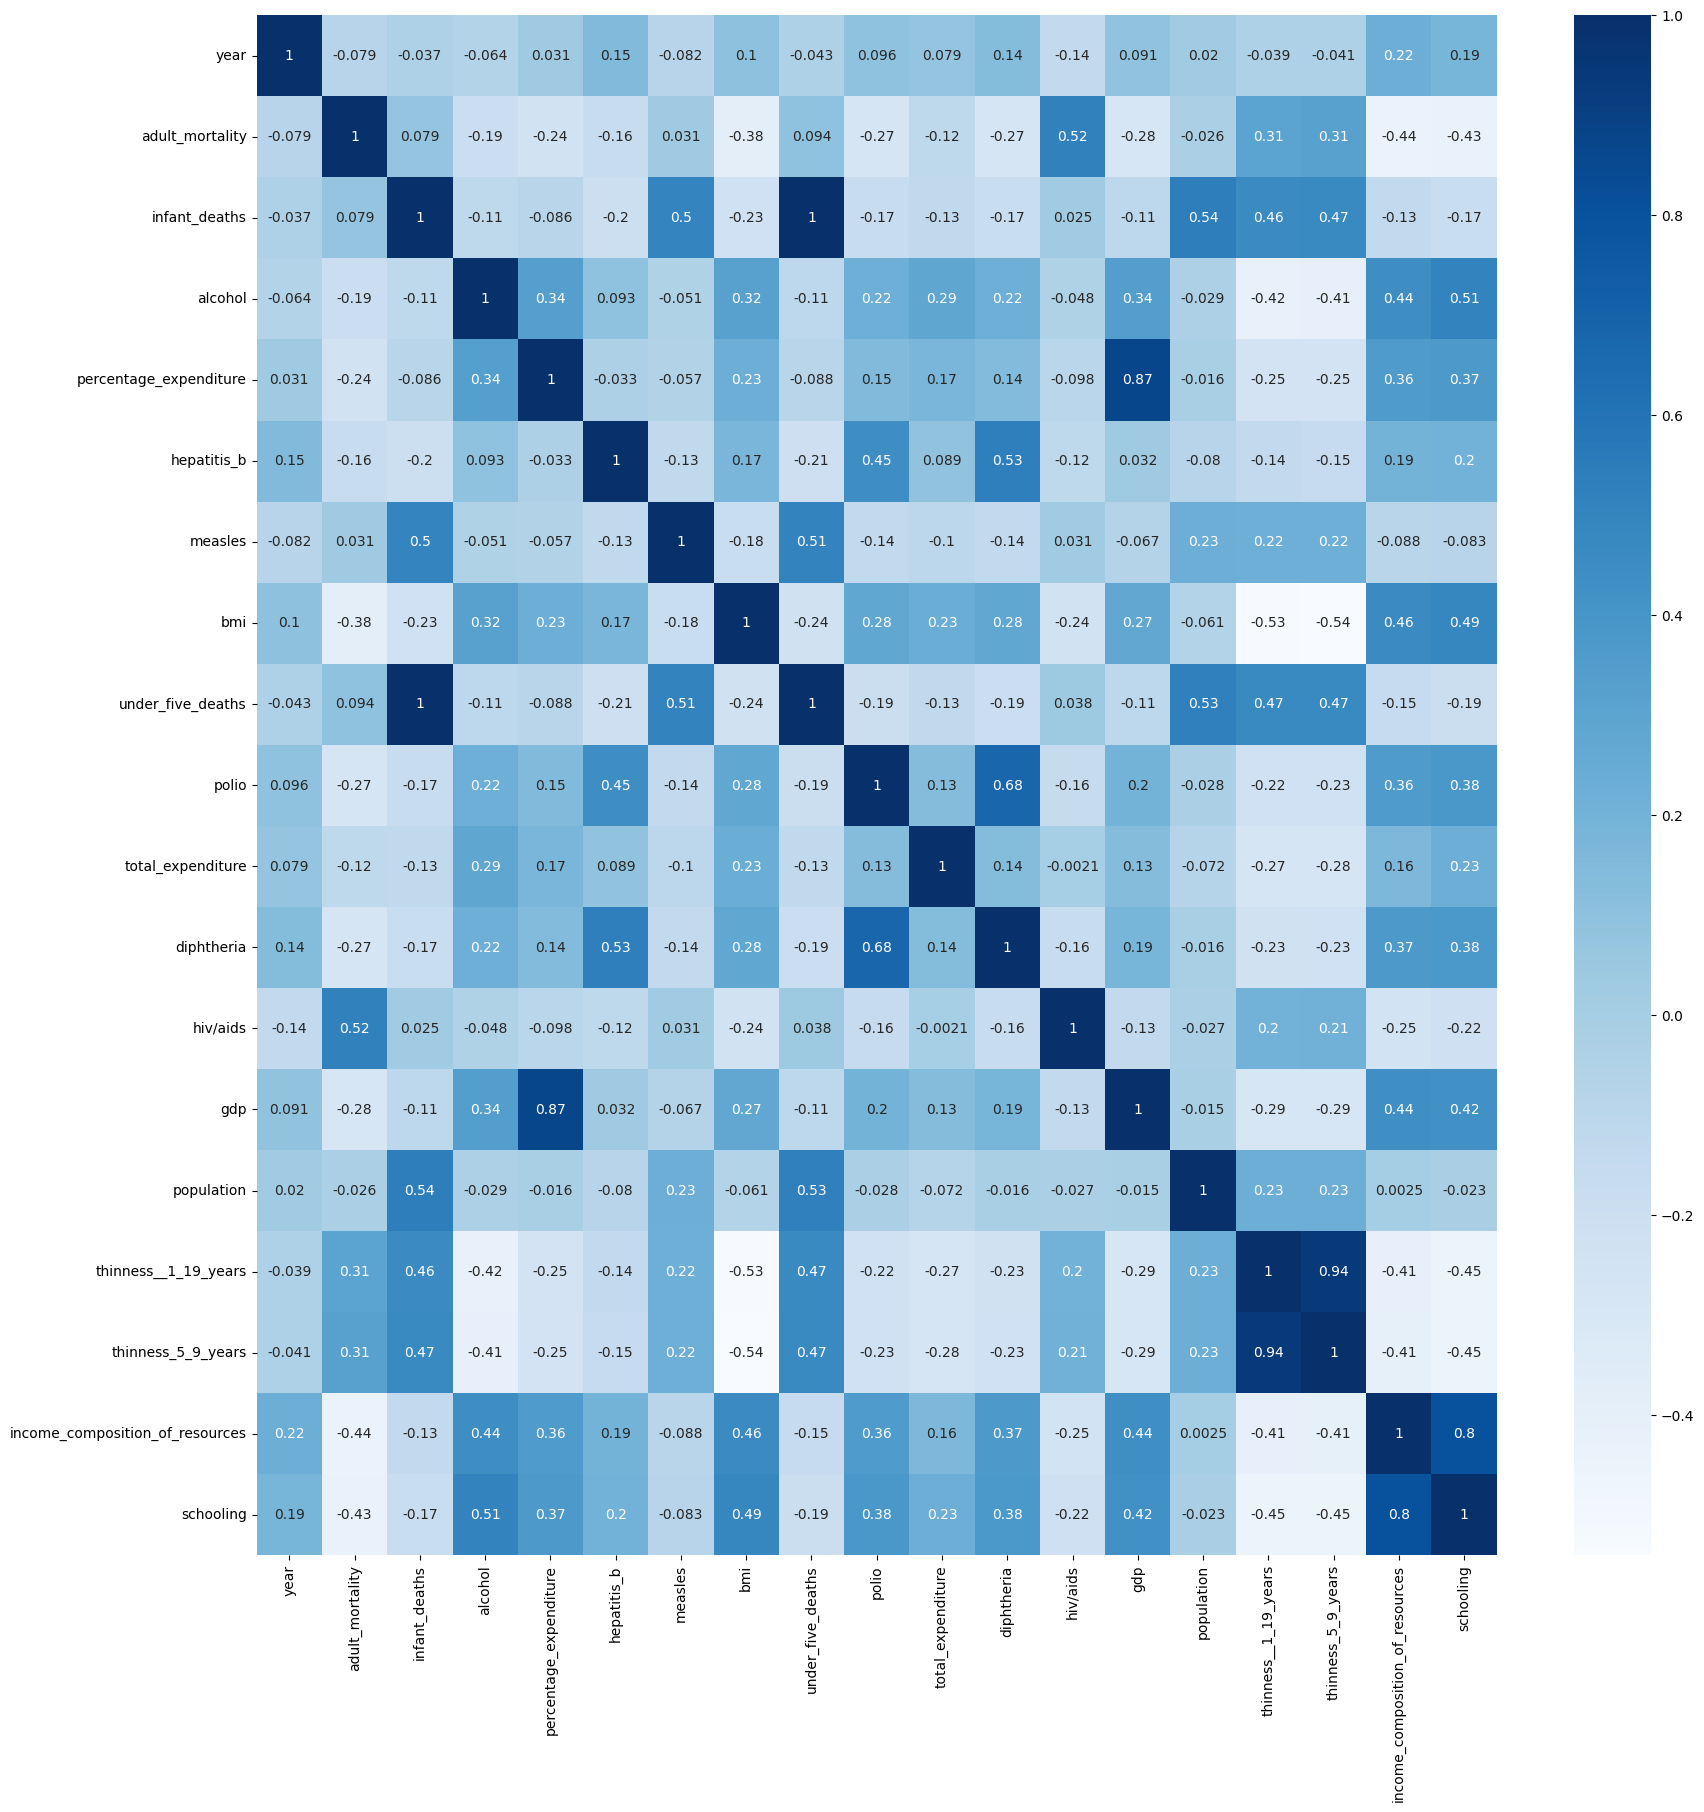

In [117]:
f, ax = plt.subplots(1, 1, figsize=(20, 20))
ax = sns.heatmap(numerical.corr(),annot = True, cmap = 'Blues',annot_kws = {'size':10})

— Univariate feature selection: From the above chart, it’s evident that thinness_1_19_years & thinness_5_9_years have a correlation of 0.94 and infant_death & under_five_deaths as 1, hence to avoid multicollinearity these columns are removed and the prediction is performed again.

In [118]:
numerical.corr()

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
year,1.000000,-0.079264,-0.037415,-0.063976,0.031400,0.146261,-0.082493,0.100417,-0.042937,0.095580,0.079139,0.135174,-0.139741,0.090543,0.020222,-0.038570,-0.040661,0.224113,0.186023
adult_mortality,-0.079264,1.000000,0.078762,-0.194441,-0.242587,-0.163298,0.031226,-0.383224,0.094134,-0.272553,-0.116144,-0.273311,0.523245,-0.284048,-0.025985,0.307734,0.314769,-0.441464,-0.431516
infant_deaths,-0.037415,0.078762,1.000000,-0.114917,-0.085612,-0.200878,0.501128,-0.226540,0.996629,-0.169385,-0.126082,-0.173944,0.025231,-0.107542,0.538537,0.462953,0.467439,-0.132427,-0.173890
alcohol,-0.063976,-0.194441,-0.114917,1.000000,0.337787,0.092652,-0.050564,0.319949,-0.112119,0.223014,0.289653,0.218868,-0.048292,0.342042,-0.029207,-0.420387,-0.408521,0.442584,0.507433
percentage_expenditure,0.031400,-0.242587,-0.085612,0.337787,1.000000,-0.033398,-0.056596,0.228084,-0.087852,0.147584,0.169818,0.144017,-0.097857,0.871321,-0.016222,-0.252133,-0.253622,0.359596,0.369825
hepatitis_b,0.146261,-0.163298,-0.200878,0.092652,-0.033398,1.000000,-0.129593,0.172900,-0.208691,0.446177,0.088883,0.533033,-0.117463,0.032309,-0.079874,-0.141942,-0.150781,0.194108,0.201851
measles,-0.082493,0.031226,0.501128,-0.050564,-0.056596,-0.129593,1.000000,-0.175347,0.507809,-0.135067,-0.102893,-0.140774,0.030899,-0.067454,0.229739,0.222427,0.217983,-0.087682,-0.082934
bmi,0.100417,-0.383224,-0.226540,0.319949,0.228084,0.172900,-0.175347,1.000000,-0.236850,0.282080,0.233717,0.280483,-0.243181,0.272128,-0.060768,-0.533952,-0.540459,0.461804,0.488591
under_five_deaths,-0.042937,0.094134,0.996629,-0.112119,-0.087852,-0.208691,0.507809,-0.236850,1.000000,-0.187343,-0.127675,-0.194375,0.038062,-0.110899,0.526088,0.465291,0.468655,-0.149867,-0.188891
polio,0.095580,-0.272553,-0.169385,0.223014,0.147584,0.446177,-0.135067,0.282080,-0.187343,1.000000,0.130561,0.675339,-0.158214,0.196429,-0.027640,-0.224021,-0.225768,0.360889,0.383282


In [119]:
num = final.drop(['infant_deaths','under_five_deaths','thinness__1_19_years','thinness_5_9_years'],axis = 1)
num

,year,adult_mortality,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,polio,total_expenditure,diphtheria,...,185,186,187,188,189,190,191,192,0,1
0,2015,263.0,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2014,271.0,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2013,268.0,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2012,272.0,0.01,78.184215,67.0,2787,17.6,67.0,8.52,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2011,275.0,0.01,7.097109,68.0,3013,17.2,68.0,7.87,68.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,723.0,4.36,0.000000,68.0,31,27.1,67.0,7.13,65.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2934,2003,715.0,4.06,0.000000,7.0,998,26.7,7.0,6.52,68.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2935,2002,73.0,4.43,0.000000,73.0,304,26.3,73.0,6.53,71.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2936,2001,686.0,1.72,0.000000,76.0,529,25.9,76.0,6.16,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [120]:
X1 = num
Y1 = df1['life_expectancy']

In [121]:
from sklearn.model_selection import train_test_split
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST = train_test_split(X1,Y1,train_size = 0.80)

In [122]:
from sklearn.linear_model import LinearRegression
newmodel =  LinearRegression()
newmodel.fit(X_TRAIN,Y_TRAIN)
newmodel.predict(X_TEST)

array([68.07228448, 73.43932625, 76.39971503, 52.98687222, 74.70789683,
       71.20051084, 61.20666557, 75.48983184, 71.81315763, 61.35337273,
       80.58966774, 81.41589603, 74.58639689, 75.45924868, 71.67461401,
       74.97469648, 57.08444064, 62.65791738, 73.33876849, 84.16778186,
       53.37568629, 53.19920042, 79.80069007, 79.17783143, 70.28880731,
       72.86482328, 61.20242749, 76.19632587, 80.54004455, 70.77416335,
       55.9602638 , 44.67481113, 73.61737901, 80.48686248, 72.24229968,
       73.08278344, 68.97022894, 72.8478996 , 75.97263103, 81.04502978,
       48.85869666, 72.2395193 , 70.71621372, 73.30688429, 83.55397006,
       52.26626759, 75.12254116, 74.99228932, 73.96386505, 75.2325449 ,
       74.56495978, 76.4749514 , 73.06839935, 72.71727704, 67.46418705,
       73.77287703, 55.24668283, 69.77148871, 81.5279988 , 54.1452329 ,
       70.75717436, 47.95122783, 75.30031427, 60.97035116, 60.0578256 ,
       78.17768648, 55.55805698, 82.5942839 , 52.77486269, 68.04

In [125]:
newmodel.score(X_TEST,Y_TEST)

0.9618774375894603

In [126]:
from sklearn import metrics
mae = metrics.mean_absolute_error(Y_TEST,newmodel.predict(X_TEST))
mae

1.1893787887941805

In [127]:
r2 = metrics.r2_score(Y_TEST,newmodel.predict(X_TEST))
r2

0.9618774375894603

In [128]:
import statsmodels.api as sm
X_TEST = sm.add_constant(X_TEST)
better_model = sm.OLS(Y_TEST,X_TEST).fit()

In [129]:
print(better_model.rsquared_adj)

0.9640772719747808


As can be seen, removing the multicollinear columns has improved the model’s performance. Both R2 & adjusted R2 value have increased

8. Visualization

<Axes: xlabel='status', ylabel='life_expectancy'>

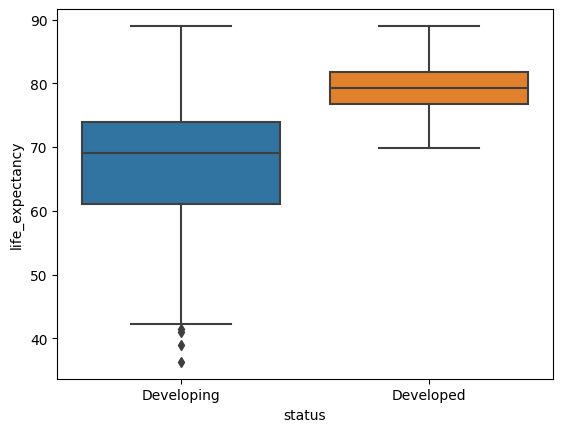

In [130]:
import seaborn as sns
sns.boxplot(x ='status', y = 'life_expectancy', data = df1)

<Axes: xlabel='alcohol', ylabel='life_expectancy'>

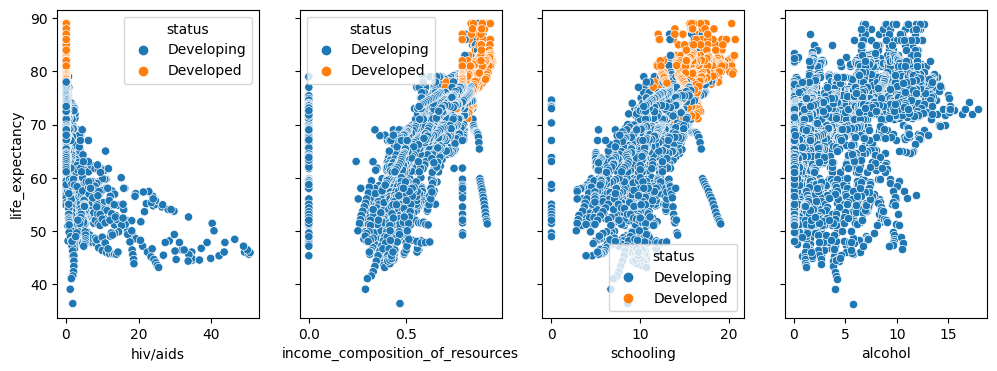

In [131]:
import seaborn as sns

fig, (ax1, ax2, ax3,ax4) = plt.subplots(ncols=4, sharey=True,figsize = (12,4))
sns.scatterplot(x ='hiv/aids', y = 'life_expectancy', data = df1, hue = 'status',ax = ax1)
sns.scatterplot(x ='income_composition_of_resources', y = 'life_expectancy', data = df1, hue = 'status',ax = ax2)
sns.scatterplot(x ='schooling', y = 'life_expectancy', data = df1, hue = 'status',ax = ax3)
sns.scatterplot(x ='alcohol', y = 'life_expectancy', data = df1,ax = ax4)


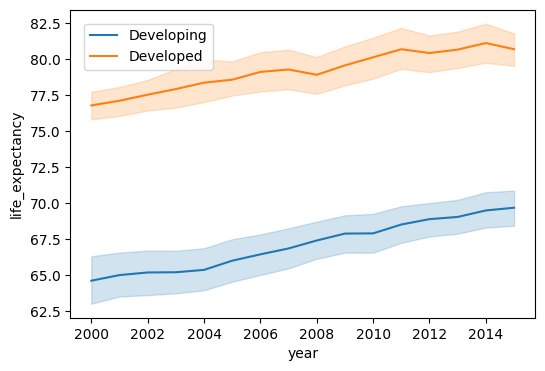

In [132]:
import seaborn as sns

fig, (ax1) = plt.subplots(ncols=1, sharey=True,figsize = (6,4))
sns.lineplot(x ='year', y = 'life_expectancy', hue = 'status' ,data = df1)
plt.legend(loc= 'upper left',borderaxespad = 1)


It is quite clear that the life expectancy of developed countries extends upto 80-85 years whereas for developing countries its is limited to 70.